# One-sample T-Tests in scipy

One-sample t-tests используется для сопоставления среднее значение выборки и среднее значение гипететической популяции. Например, one-sample t-test может быть использован для того чтобы ответить на вопросы такие как:
- действительно ли среднее время проведенное пользователем сайта отличается от 5 минут?
- действительно ли среднее кол-во денег которые покупатели тратят на покупки более 10 долларов?

Как пример, давайте представим выдуманный бизнес и назовем его BuyPie, компания занимается тем что отправляет ингридиенты для пирогов покупаетелем что они сами могут приготовить его дома. Предположим что продуктовый менеджер BuyPie хочет чтобы средний чек вырос до 1000 рупиев в среднем. За прошлый день, 50 человек сделали онлайн покупки и их средний чек составил сумму меньше 1000 рупиев. Действительно ли покупатели потратили в среднем меньше 1000 рупиев на покупку? Или же это результат случайности и проблема малого размера выборки?

In [3]:
# импортируем библиотеки
import numpy as np
# запишем данные в переменную
prices = np.genfromtxt('datasets/prices.csv')
# посмотри что находится внутри
print(prices)

[ 978. 1080.  999.  855. 1105.  961.  899. 1061.  880. 1455.  505.  936.
 1024.  982.  840.  930.  829.  504.  955. 1380. 1361. 1130.  946.  973.
 1076. 1131.  810.  734. 1275.  867.  962.  865.  709. 1216.  735.  768.
  757. 1060.  715.  839.  999. 1259. 1194. 1082. 1129. 1255.  931. 1236.
  921.  907.]


In [5]:
# давайте расчитаем среднее значение набора данных
prices_mean = np.mean(prices)
# выведем значение
print(prices_mean)

980.0


## Составим гипотезы
- Нулевая гипотеза: Среднее значение чека 1000 рупи
- Альтернативная: Среднее значение чека не 1000 рупи

Для того чтобы провести T-Test можно воспользоваться библиотекой scipy в которой содержится метод ttest_1samp(), который позволяет произвести тестирование one-sample t-test.

Данный метод принимает на вход два параметра:
- распределение выборки (список значений prices)
- и среднее для проверки

Метод будет возвращаться кортеж из двух значений:
- tstat
- pval

Метод использует распределение выборки чтобы определить размер выборки и определить величину вариации всей популяции, что позволит определить нулевое распределение.

In [6]:
# импортируем библиотеку
import scipy.stats as stats
import numpy as np

# запишем данные в переменную
prices = np.genfromtxt('datasets/prices.csv')
# отобразим значение переменной
print(prices)
# рассчитаем среднее значние популяции
prices_mean = np.mean(prices)
# выведем значением среднего
print(f'Среднее значение набора данных: {prices_mean}')

[ 978. 1080.  999.  855. 1105.  961.  899. 1061.  880. 1455.  505.  936.
 1024.  982.  840.  930.  829.  504.  955. 1380. 1361. 1130.  946.  973.
 1076. 1131.  810.  734. 1275.  867.  962.  865.  709. 1216.  735.  768.
  757. 1060.  715.  839.  999. 1259. 1194. 1082. 1129. 1255.  931. 1236.
  921.  907.]
Среднее значение набора данных: 980.0


In [8]:
# расчитаем значение pval для двух гипотез
tstat, pval = stats.ttest_1samp(prices, 1000)
print(pval)

0.4920744804182786


## Предположение на основе One Sample T-Test

Когда проводится тестирование любой гипотезы, очень важно знать и верифицировать допустимые значения теста. Допустимые значения для One-Sample T-Test следующие:

- Выборка величин должна быть случайной и должна быть выбрана из популяции
    - Например, если вы собираете данные только о посетителях сайта кто согласен делится своей персональной информацией, это не является случайным выбором посетителей сайта и может отличаться от большей популяции
- Личные наблюдения должны быть независимыми
    - Например, если один посетитель BuyPie любит яблочный пирог он купит так много и что даже убедил своего друга тоже купить один наборЮ, данное наблюдение не является независимым.
- Данные должны быть распределены нормально без выбросов или аномальных значений или размер набора данных должен быть достаточно большим
    - Не существует определенного правила по которому нужно отбирать размер выборки, но стандартным размером считается 40 значений. Например выборку из менее чем 40 значений, или даже еще меньше есть смысл отрисовать на гистограмме чтобы проверить часто ли попадают выбросы в выборку, если да то в таком случае one-sample t-test не предпочтителен


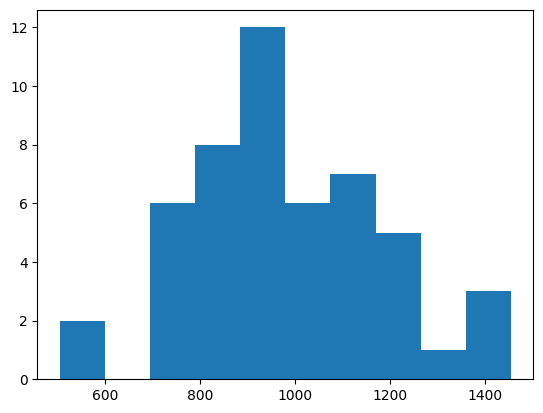

<Figure size 640x480 with 0 Axes>

In [9]:
# импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt

# записываем данные в переменную
prices = np.genfromtxt('datasets/prices.csv')

# сформируем гистограмму
plt.hist(prices)
plt.show()
plt.clf()